# Coding Exercise Thirteen: Interface
Revisiting a database (such as our example, gathered from Tweepy) and exploring methods for visualizing the data to others. The exercise explored:

- Imported/collected data as appropriate, using OS or API
- Make and structure your data in a Pandas dataframe
- Used NLTK to tokenize the data, and chart a word cloud
- Created a "wordcloud of interest" by playing with the visualization methods from the class demo, with others documented in the API
- Imported Bokeh, charting some aspect of the text (wordcount, topics, or sentiment analysis as demoed)

Note: Considered exploring other visualization types in the Bokeh API documentation, and played with the color options and scale of the visualization as adopting “good enough practices in scientific computing (Wilson et al. 2017) identify a minimal set of practices which every researcher can adopt, regardless of their current level of computational skill” (Karsdorp, Kestemont, Riddell 323) allows for the continuation of code exploration to the fullest.


## Stage One: Import or collect your data as appropriate, using OS or an API

Web Scraping Metacritic Reviews using BeautifulSoup "A simple 6-step guide to scraping Metacritic game reviews using BeautifulSoup and saving them into a pandas dataframe.documented" at: https://towardsdatascience.com/web-scraping-metacritic-reviews-using-beautifulsoup-63801bbe200e
#we're going back to week six to import reviews, but this time we're getting all of them!

Comfort has been established as BeautifulSoup enables movement to work without an API. so enforncement of starting "with a problem or a question. If your problem or question is not well defined, develop or find one which is” (Karsdorp, Kestemont, Riddell 323).




In [180]:


import requests
from bs4 import BeautifulSoup
import pandas as pd

## Stage Two: Make and structure your data in a Pandas dataframe
use of explirng the URL of interest, https://www.metacritic.com/game/playstation-3/the-walking-dead-a-telltale-games-series/user-reviews?page=

“Consider many models. Different narratives are often compatible with the same set of observations” (Karsdorp, Kestemont, Riddell 324). 


In [182]:
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}
for i in range(0, 50):
    url = 'https://www.metacritic.com/game/playstation-3/the-walking-dead-a-telltale-games-series/user-reviews?page=' + str(i)
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review_content'): 
        if review.find('div', class_='name') == None:
            break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'): 
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
           # print(review.find('span', class_='blurb blurb_expanded').text)
        elif review.find('div',class_='review_body').find('span') == None:
            review_dict['review'].append('No review text.')
           # print("No review")
        else:
            review_dict['review'].append(review.find('div',class_='review_body').find('span').text)
          #  print(review.find('div',class_='review_body').find('span').text)

Creating Pandas' data frame was a smooth process, which contributed to the fun lines. “Account for variability in human judgments. If your research relies on human labeling or categorization of features of cultural artifacts, verify that different humans agree” (Karsdorp, Kestemont, Riddell 324).


In [183]:
ac_reviews = pd.DataFrame(review_dict)
print(ac_reviews)

                name          date rating  \
0           chujfugh  Dec 12, 2012     10   
1      the_blueprint  Dec 11, 2013      8   
2    SayHeyToPhillip  Jun 27, 2014      9   
3     TheOnlineGamer  Jan 13, 2014     10   
4          HSPLazerz  May  8, 2015     10   
..               ...           ...    ...   
111           Folmer  Feb 23, 2019     10   
112           Xalted  Oct 22, 2019     10   
113          INU4SH4  Jul  3, 2020      9   
114     EndlessAbyss  Sep 27, 2020     10   
115     kappawappa23  Apr  5, 2021     10   

                                                review  
0    For 30 years, games have been held back by the...  
1    I like the game because the story and characte...  
2    The Walking Dead gathers everything from enter...  
3    Captures the essence of The Walking Dead Comic...  
4    By far, the best game I have ever, and will ev...  
..                                                 ...  
111  This game has a really great story, and it is ...  
112

## Stage Three: Use NLTK to tokenize the data, and chart a word cloud

Used to clean up and help remove characters etc., as BeautifulSoup enabled significant aspects of cleaning setup. “Explore ideas from math and (Bayesian) statistics. Good ideas are found everywhere” (Karsdorp, Kestemont, Riddell 324).




In [184]:
import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [185]:
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_reviews(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [186]:
cleaned_reviews = []
for i in range(0,len(ac_reviews['review'])):
    cleaned_reviews.append(cleaning_reviews((ac_reviews.review[i])))
print(cleaned_reviews[0:5])

['for years games have been held back the idea that fun defining factor sure love fun and one the most powerful ways engross player but imagine all films fit under the category fun wouldn have films like schindler list hurt locker apocalypse now and the godfather our medium has never had our own citizen kane own godfather until now spec ops the line was the apocalypse now gaming and skyrim the lord the rings the walking dead the dead alive and even that isn doing justice dead alive the best zombie film ever look past the glitches and have near perfect game the puzzles are tricky and take fair bit though the art style the best use cell shading seen the characters are well written and have arcs its atmosphere very tense and you have the urge play the very end once you picked the episodes themselves were quite short hours best but the retail release actually makes seem like one coherent game instead playing parts game months apart actions have consequences the littlest choice has the huge

Stop words associated with limiting items toward being helpful. “In the documentary film DNA Dreams, viewers are taken inside of “the world’s largest genomics organization,” which is based in Shenzhen, China. Thousands of scientists are working there to uncover the genetics of intelligence (among other traits)” (Benjamin 114). 

In [187]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["walking","dead","telltale","kill"])

Used variance in code and color, and size enabled for visualized experimentation and expression. “The creation of digital assets will then serve the project’s overall design” (Drucker 193).


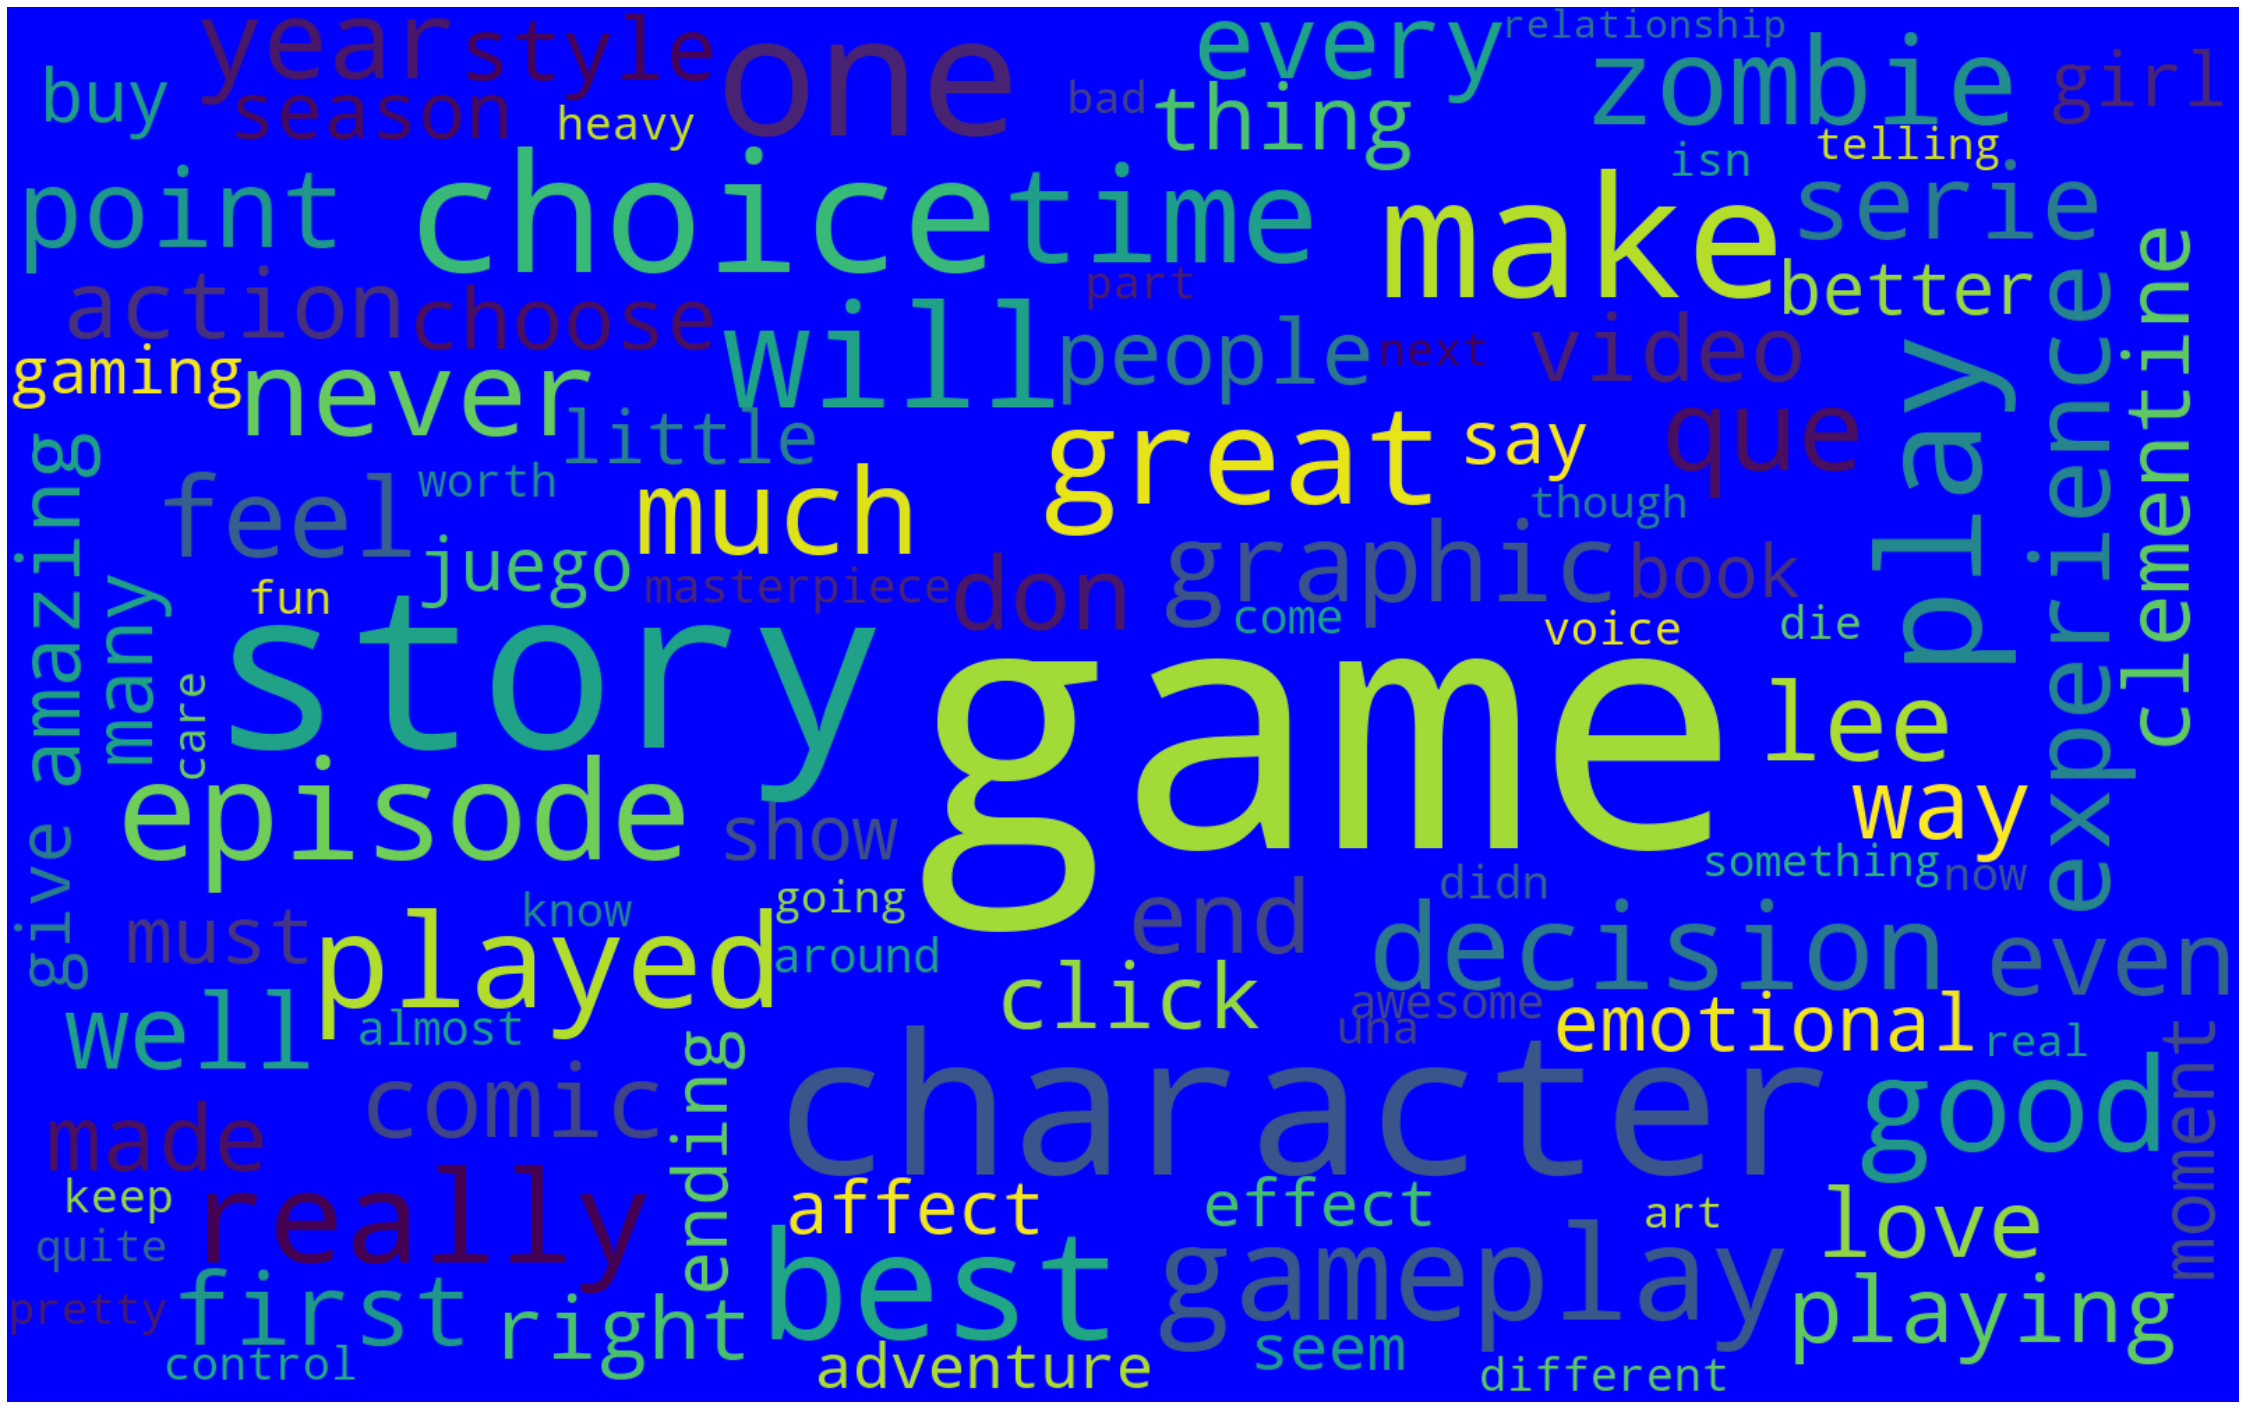

In [188]:
string = pd.Series(cleaned_reviews).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=1000,max_font_size=250,max_words=100,collocations=False, background_color='blue').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Stage Four: Create a "wordcloud of interest" by playing with the visualization methods from the class demo, or others documented in the API



In [190]:
import numpy as np
from PIL import Image
import random

mask = np.array(Image.open('Walk.PNG'))

Took out subplots and changed toward color variance of color.  Fund fixed color numbers and played with the range. A higher resolution image is better.

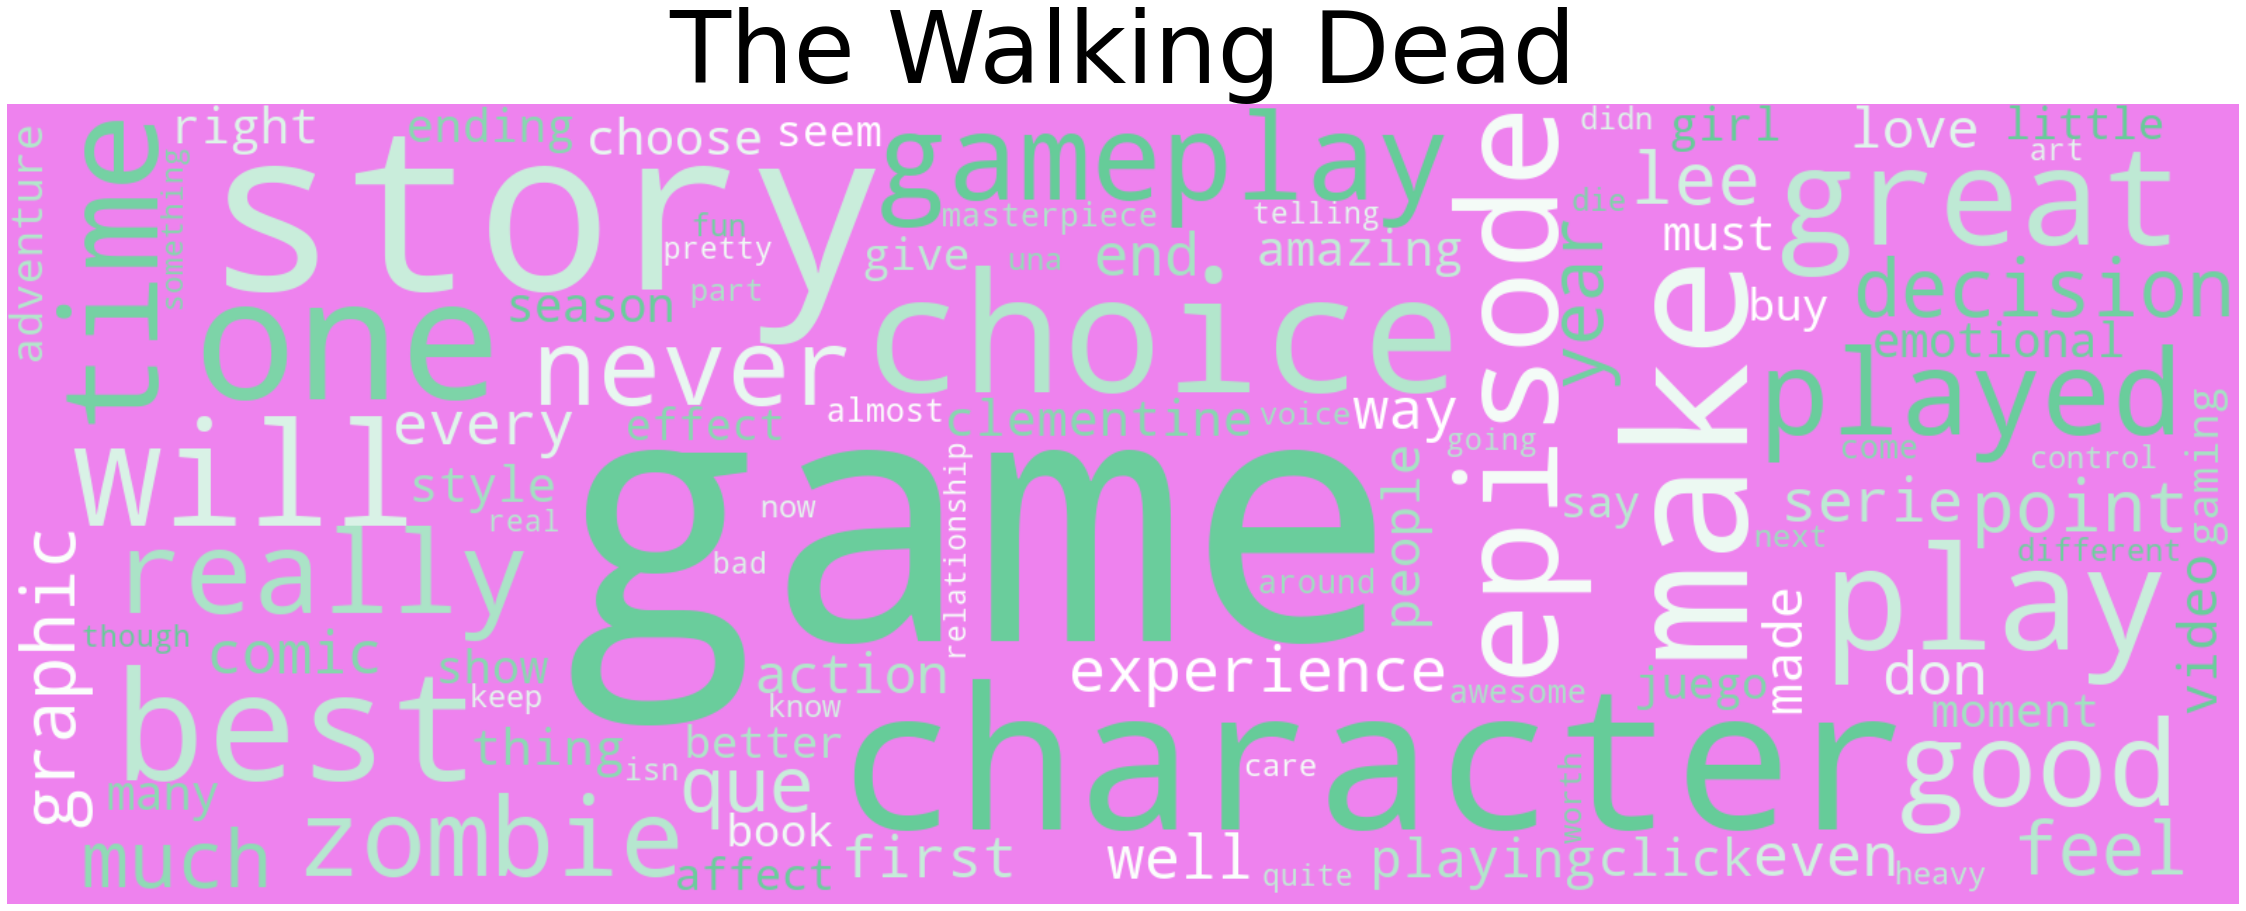

In [191]:
wordcloud = WordCloud(width=2000, mask = mask,stopwords=stopwords,height=1000,max_font_size=250,max_words=100,collocations=False,background_color='violet').generate(string)
f = plt.figure(figsize=(40,30))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(150, 50%%, %d%%)" % random.randint(60, 100)
plt.axis("off")

plt.imshow(wordcloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")
plt.title('The Walking Dead', size='100')
plt.axis("off")
plt.show()

## Stage Five: Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed



A sentiment drew interest in charting differences in a sentiment score, which became the range of judgments, etc. “Knowledge of the existing tools and platforms for this aspect of research is important” (Drucker 199).


In [192]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

# Next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [193]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sid.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [194]:
ac_reviews['Sentiment Score'] = ac_reviews['review'].apply(calculate_sentiment)
ac_reviews.sort_values(by='Sentiment Score', ascending=False)[:15]

,name,date,rating,review,Sentiment Score
71,MooreReviews,"Jun 18, 2013",9,I took shot In the dark with this game. The on...,0.9967
72,Jellybean15,"Aug 6, 2013",9,"When I first received this game in the mail, I...",0.9942
87,dj_cole,"Nov 17, 2014",8,The best way to describe the Walking Dead Seas...,0.9934
19,TheQuietGamer,"Dec 28, 2012",9,Just a heads up I have played all 5 episodes o...,0.9916
62,dirtyjeff,"Apr 1, 2013",7,I'm not a fan of the Walking Dead TV series bu...,0.9888
0,chujfugh,"Dec 12, 2012",10,"For 30 years, games have been held back by the...",0.9883
74,mijxero,"Aug 2, 2014",10,I don't normally give out 10s but this game de...,0.9848
51,Toffenuff,"Jul 2, 2014",9,"I'm a big fan of open-world, make-your-own sto...",0.9835
76,SJ-ULTI-Reiews,"Sep 29, 2013",10,"This game was my Game of the Year for 2012, an...",0.9823
3,TheOnlineGamer,"Jan 13, 2014",10,Captures the essence of The Walking Dead Comic...,0.9819


New with color pallets etc., tried jitter and palettes import. Review scores are numerical were as the jitter brings in due to being applied to the bar o space.

In [201]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.palettes import Viridis256
from bokeh.models.tools import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
from bokeh.models.tools import WheelZoomTool
from bokeh.transform import jitter

#file for output
output_file(filename="ac.html", title="AC Reviews Visualization")

I experimented with the range and size of indicators, etc. “A platform with a broad user community is more likely to last—and to provide help support in the form of list-servs and other venues” (Drucker 199).

In [211]:
ac_reviews['rating'] = ac_reviews['rating'].astype(int)
source = ColumnDataSource(ac_reviews)
mapper = linear_cmap(field_name='Sentiment Score', palette=Viridis256 ,low=-3 ,high=2)
p = figure(plot_height=1000, plot_width=1000, toolbar_location="below")
p.circle(x=jitter('rating',width=2,range=p.x_range), y='Sentiment Score', source=source, size=10, line_color=mapper,color=mapper, fill_alpha=1)
p.toolbar.active_scroll = WheelZoomTool()
p.title.text = 'The Walking Dead Reviews'
p.xaxis.axis_label = 'Review Score'
p.yaxis.axis_label = 'Sentiment Score'

Even though it is light in modes, HTML visual presentation does show the separation of scores of sentiment, etc., separated by light and dark components. “But a repository like GitHub (though, actually, there are not many “like” it) is an invaluable resource for anyone working on digital project development” (Drucker 208).


In [212]:
from bokeh.models.tools import PanTool, WheelZoomTool

color_bar = ColorBar(color_mapper=mapper['transform'], width=8)
p.background_fill_color = "gray"
p.add_layout(color_bar, 'right')

hover = HoverTool()
hover.tooltips= """
<div style="width:200px;"><b>Review: </b>
@review
</div>
"""

p.add_tools(hover)

output_notebook()

show(p)

Loading BokehJS ...